# Topic Modeling on Marketing Podcast Text


---



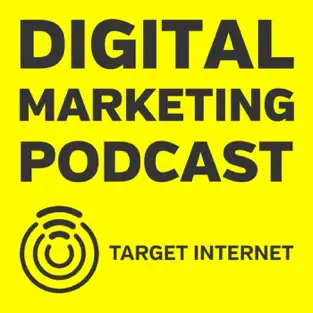

Reference: https://podcasts.apple.com/lb/podcast/culture-ate-my-brand-improving-company-culture-results/id373596600?i=1000542336192

# **Project Summary**

*   **Team Members**

    Ashley Keung, Billy Choy, Boli Qiao, Juan Figini, Jonathan Chu

*   **Project Objectives**

  1.   Identify key topics and subtopics from the digital marketing podcast. 
  2.   Compare topics and subtopics with podcast summaries. 
  3.   Document techniques and findings.


      
      

*   **How does topic modeling (Keyphrase Extraction) work？**
      1.   **Lemmatize Text**: It doesn’t make sense to include each and every word in the vocabulary of the text passage when words like writing’, ‘written’, ‘wrote’ as they mean the same: ‘write’. So, we lemmatize text, i.e., bring each word to its root form before anything else.

      2.   **Select Potential Phrases**: Text passages contain many words, but not all of them are relevant. Most of them might be frequently used words like ‘a’, ‘that’, ‘then’ and so on. Such words, called stopwords, must be filtered else they will contaminate the output. Consecutive words bearing contextual similarity must be grouped together.

      3.   **Score Each Phrase**: Once you have a list of possible phrases, you need to rank them to figure out which one is the most important.






*   **3 potential methods to do topic modeling**

      **-----Method 1:-----**

      Supporting digital content marketing and messaging through topic
modelling and decision trees

  > Gregoriades, A., Pampaka, M., Herodotou, H., & Christodoulou, E. (2021). Supporting digital content marketing and messaging through topic modelling and decision trees. Expert Systems with Applications, 184, 115546. https://doi.org/10.1016/j.eswa.2021.115546

      *   **Step1:** Sentiment analysis with Textblob and Vader
      *   **Step2:** Structural Topic Modeling with stm package in R, one-vs-rest binarization strategy to deal with sparse matrices issues
      *   **Step3:**.000-+ SMOTE for imbalance data
      *   **Further steps:** Decision Tree for further study within the authors’ topic which is not relevant to our project

    **-----Method 2:-----**

  How Did People Cope During the COVID-19 Pandemic? A Structural Topic Modelling Analysis of Free-Text Data From 11,000 United Kingdom Adults

  > Wright, L., Fluharty, M., Steptoe, A., & Fancourt, D. (2022). How did people cope during the COVID-19 pandemic? A structural topic modelling analysis of free-text data from 11,000 United Kingdom adults. Frontiers in Psychology, 13. https://doi.org/10.3389/fpsyg.2022.810655 

      *   **Step 1:** Data Cleaning
      *   **Step 2:** used STM, implemented with the stm R package
      
    **-----Method 3:-----**
        
  Geographical Topic Modelling on Spatial Social Network Data

  > Funkner, A. A., Elkhovskaya, L. O., Lenivtceva, I. D., Egorov, M. P., Kshenin, A. D., & Khrulkov, A. A. (2021). Geographical topic modelling on Spatial Social Network Data. Procedia Computer Science, 193, 22–31. https://doi.org/10.1016/j.procs.2021.10.003 

      *   **Step 1:** Data Preprocessing
	Remove the emoji, link
	Language detection
	Lemmenization 
	Filtering for stop
      *   **Step 2:** STM by Additive Regularization of Topic Models
      *   **Step 3:** Topic aggregation
      *   **Step 4:** Topic Segementation


*   **Methods for this project**

      1.   Transcribe Podcast Audio into the transcript by using Microsoft Word for Web. 

      2.   Perform data cleansing and conduct descriptive analysis on transcribed files. 

      3.   Extract keywords using Rapid Keyword Extraction (RAKE) Algorithm in Natural Language Processing.

      4.   Use another package, Gensim and LDA, to perform vectorization and identify subtopics using Fuzzy clustering.

      5.   Based on the finding, cross-check with the channel description.




---









# **1. Import and Prepare data**



## 1.0 Introduction of sample podcast file

In this project, we demonstrate our work on digital marketing podcast data. We download the audio file from the website and then use Microsoft Word for Web to transcribe the audio files into text.

This is the sample of a Podcast Audio mp3 file:
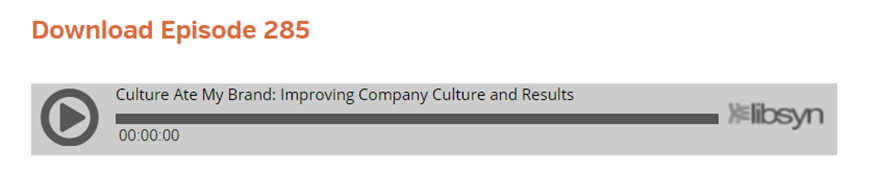


Using Microsoft Words for Web to transcribe Audio File to Text:


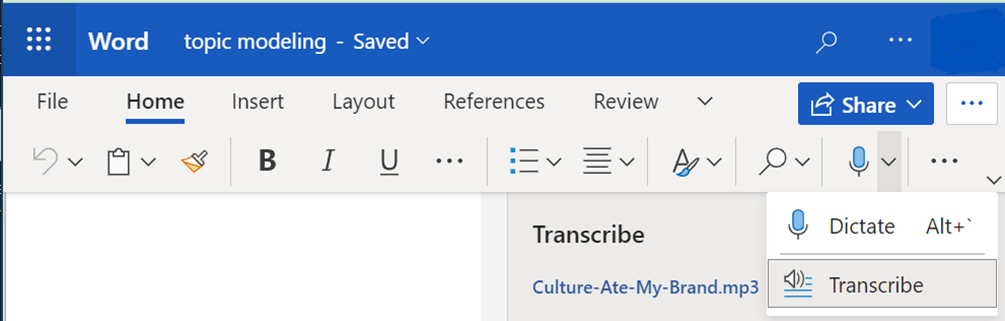

We selected one podcast as a sample to do topic modelling. The topic is  "**Culture Ate My Brand - Improving Company Culture & Results**".  The duration of this podcast audio is 32 minutes, and this podcast is about how company culture can help enterprises win more loyal customers.

We transcribed this podcast audio file into a transcript text file, which contains a timestamp, speakers and speech content at that moment. Some sample screenshots as below: 

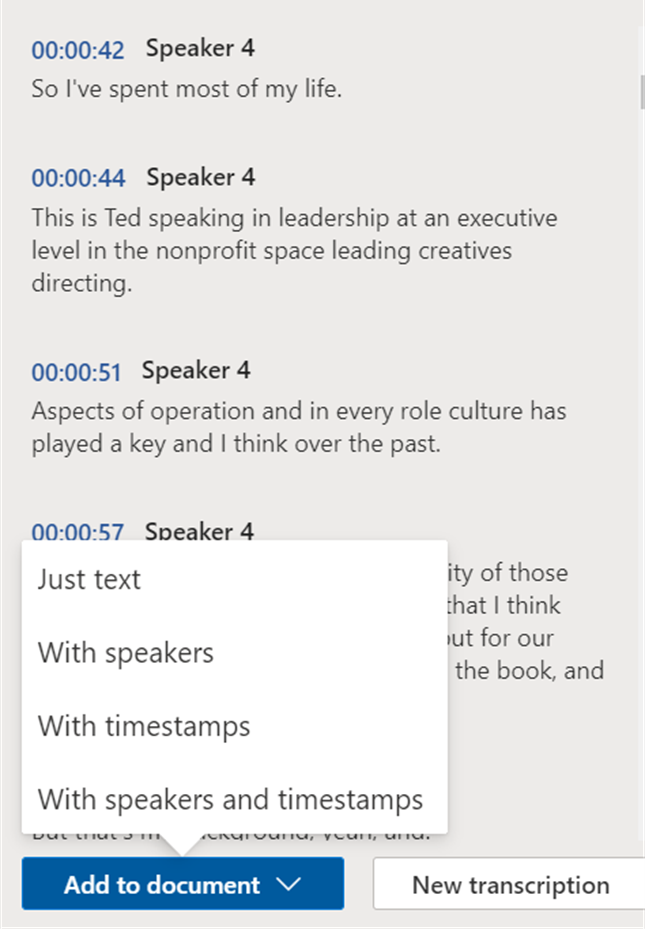



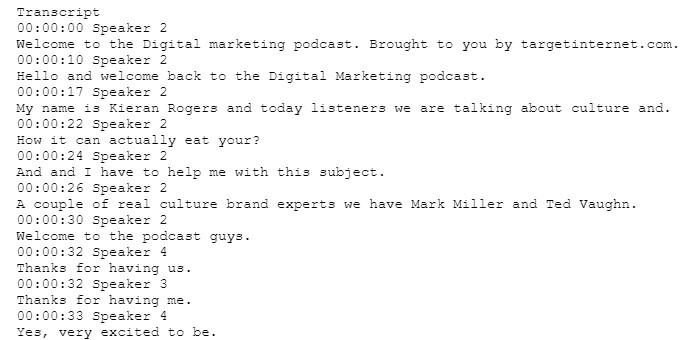



As we can see every odd row is conversation content and every even row is time stamp and speakers information.

Podcast resource: https://podcasts.apple.com/lb/podcast/culture-ate-my-brand-improving-company-culture-results/id373596600?i=1000542336192 

## 1.1 Loading data from the input file.

In [ ]:
# Import useful libraries
import pandas as pd
import numpy as np

#Create a variable for the file name
filename = "Culture ate my Brand_ with speakers and timestamps.txt"

#Read txt file into dataframe
df = pd.read_csv(filename, delimiter= '\t', index_col=False)

## 1.2 Data Cleansing Step 1 - Split dataset : **Text** and **Time-Stamp** datasets 

As we can see from the data, the file content is structure below:
  - 1st line is the text "Transcript"
  - Every even line store the speaker and time.
  - Every odd row stores the message.(From fisrt row onward)

We need to split the data into two dataset and apply cleaning accordingly. 
1.   The first dataset store time and speakers.
2.   The second dataset store the text.



In [ ]:
#Split Odd and Even row
odd_rows = df.iloc[1::2] 
even_rows = df.iloc[::2]

In [ ]:
# check odd_rows data
odd_rows.head(5)

,Transcript
1,Welcome to the Digital marketing podcast. Brou...
3,Hello and welcome back to the Digital Marketin...
5,My name is Kieran Rogers and today listeners w...
7,How it can actually eat your?
9,And and I have to help me with this subject.


In [ ]:
# check even_rows data
even_rows.head(5)

,Transcript
0,00:00:00 Speaker 2
2,00:00:10 Speaker 2
4,00:00:17 Speaker 2
6,00:00:22 Speaker 2
8,00:00:24 Speaker 2


## 1.3 Data Cleansing Step 2 -  Split column in even_row dataset: **Timestamp** and **Speaker** seperately

As we can see from even_rows dataset, the timestamp and speakers are together as one column. We have to split them into two columns individually.


- Split 1 original column into two columns.
- Drop the **speaker(word)** column, only keep the ID of speaker
- Rename column name accordingly.

In [ ]:
#For even row, split time and speaker
even_rows.head(5)

,Transcript
0,00:00:00 Speaker 2
2,00:00:10 Speaker 2
4,00:00:17 Speaker 2
6,00:00:22 Speaker 2
8,00:00:24 Speaker 2


In [ ]:
# Split the observations by space, and return 3 columns
df_even = even_rows['Transcript'].str.split(" ", expand=True) 
df_even.head(5)

,0,1,2
0,00:00:00,Speaker,2
2,00:00:10,Speaker,2
4,00:00:17,Speaker,2
6,00:00:22,Speaker,2
8,00:00:24,Speaker,2


*   Column 0 is the captured time when speaker talks about the transcript
*   Column 1 contains the word "Speaker"
*   Column 2 is corresponded speaker number

Next step is to remove column 1, and rename column 0 to "Time" and column 2 to "Speaker" accordingly.



In [ ]:
#Drop speaker column
df_even.drop(1, axis=1, inplace=True) 

In [ ]:
#Rename column.apply(str).str.
df_even.columns = ['Time','Speaker']

In [ ]:
#Check final table "df_even"
df_even.head(5)

,Time,Speaker
0,00:00:00,2
2,00:00:10,2
4,00:00:17,2
6,00:00:22,2
8,00:00:24,2


After the **Time Stamp and Speaker** table transformation. 

Next step is the **Transcipt** table : odd_rows.


In [ ]:
# Text table :
odd_rows.head(5)

,Transcript
1,Welcome to the Digital marketing podcast. Brou...
3,Hello and welcome back to the Digital Marketin...
5,My name is Kieran Rogers and today listeners w...
7,How it can actually eat your?
9,And and I have to help me with this subject.


In [ ]:
# Time Stamp and Speaker table:
df_even.head(5)

,Time,Speaker
0,00:00:00,2
2,00:00:10,2
4,00:00:17,2
6,00:00:22,2
8,00:00:24,2


# **2. Keywords Extraction -  Topics Analysis**



This section will focus on keyword extraction from the message column, we apply Rapid Keyword Extraction (RAKE) package from Natural Language Processing.



## 2.1 Concept Introduction






*   **What is Rapid Keyword Extraction (RAKE)？**

    *   Rapid Automatic Keyword Extraction (RAKE) is a well-known keyword extraction method which uses a list of stopwords and phrase delimiters to detect the most relevant words or phrases in a piece of text.

*   **Concept of RAKE is built on three matrices**
      1.   **Word Degree** (deg(w))- occur often and in longer candidates.
      2.   **Word Frequency** (freq(w))-  occur frequently
      3.   **Ratio of the degree to frequency** (deg(w)/freq(w))- favors the words that predominately occur in longer candidate keywords.







*   **What is 'Score'?**

    * RAKE return the top score keywords in each sentence.
    * Score: It is calculated by combining the word’s frequency and the number of connections (degree). 
    * Calculate the ‘degree of a word’ in the matrix, the sum of the number of co-occurrences, then divide them by their occurrence frequency. 


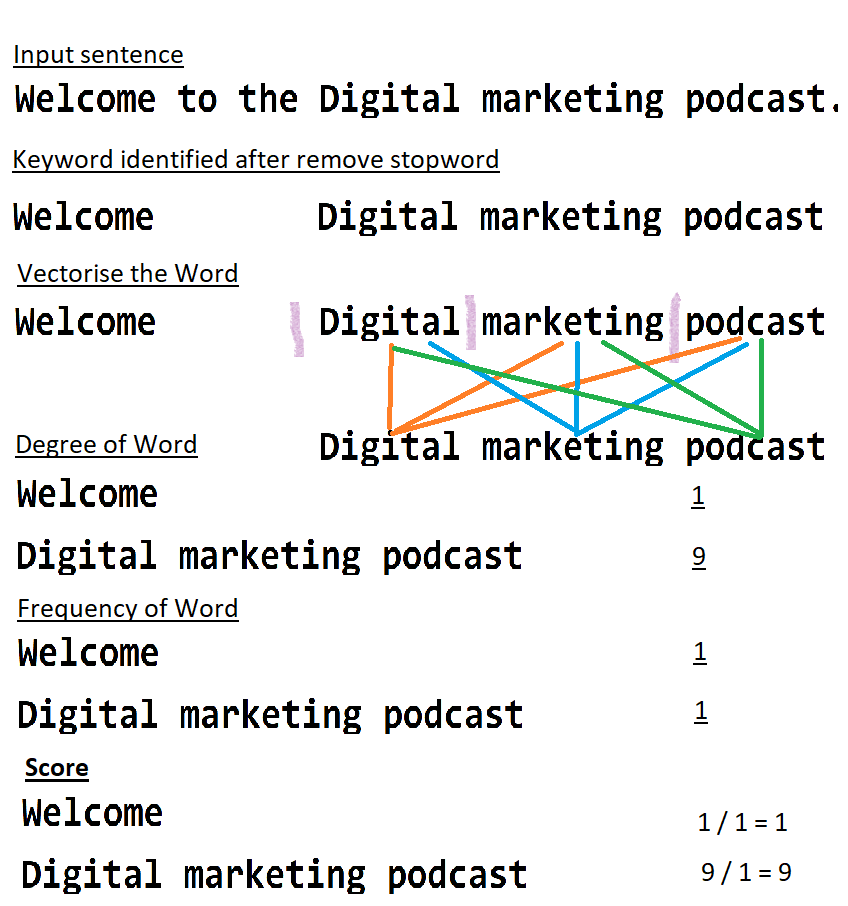

##2.2 Extract Keyword

In [ ]:
#Install package multi_rake for keyword extraction
!pip install multi_rake
from multi_rake import Rake

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41.4 MB 2.2 MB/s 
  Created wheel for pycld2: filename=pycld2-0.41-cp37-cp37m-linux_x86_64.whl size=9834230 sha256=3f21d0033be1cfc077d129b0b6ff1cb14904fbfd7bc10c4e142cf9acb7ff6a4c
  Stored in directory: /root/.cache/pip/wheels/ed/e4/58/ed2e9f43c07d617cc81fe7aff0fc6e42b16c9cf6afe960b614
Successfully built pycld2


In [ ]:
# To include all phrases even the repeated ones.
r = Rake() # Equivalent to Rake(include_repeated_phrases=True) 

In [ ]:
#Create new list to store all the top score
# Function keywords[:1] returns the top score keyword in the given sentense, in this case we only captured the top score of each sentense
data = []

for i in odd_rows['Transcript']:
  keywords = r.apply(i)
  data.append(keywords[:1])

In [ ]:
## Convert to dataframe
df_key = pd.DataFrame(data)
df_key.columns = ['topScore']
df_key.head(5)

,topScore
0,"(digital marketing podcast, 9.0)"
1,"(digital marketing podcast, 9.0)"
2,"(kieran rogers, 4.0)"
3,"(eat, 1.0)"
4,"(subject, 1.0)"


## 2.3 Data manipulation of keyword dataset

### 2.3.1 split original column

As we can see, right now the key word and scores are all in the same column. We need to split them for further analysis

In [ ]:
# new df from the column of lists
df_keyword = pd.DataFrame(df_key['topScore'].tolist(), columns=['Keyword', 'Score'])
df_keyword['Score'] = df_keyword['Score'].replace(np.nan, 0)

In [ ]:
# display the resulting df
df_keyword.head(5)

,Keyword,Score
0,digital marketing podcast,9.0
1,digital marketing podcast,9.0
2,kieran rogers,4.0
3,eat,1.0
4,subject,1.0


### 2.3.2 Null check and word replacement##
This section aims to replace null value with meaningful words.
 - For Speaker is null, will be replaced as "No Speaker"
 - For Keyword is empty, will be replaced as "No Keyword Identified"

In [ ]:
df_keyword

,Keyword,Score
0,digital marketing podcast,9.0
1,digital marketing podcast,9.0
2,kieran rogers,4.0
3,eat,1.0
4,subject,1.0
...,...,...
455,digital marketing podcast,8.0
456,free trial,4.0
457,None,0.0
458,None,0.0


In [ ]:
df_even.isnull().sum()

Time       0
Speaker    1
dtype: int64

In [ ]:
#fill in the null value
df_even["Speaker"].fillna("No Speaker", inplace = True)

In [ ]:
df_keyword.isnull().sum()


Keyword    32
Score       0
dtype: int64

In [ ]:
#fill in the null value
df_keyword["Keyword"].fillna("No Keyword Identified", inplace = True)

### 2.3.3 Preperation for Combining tables - Assign index "New_ID" on both dataframe before joining.



Now we have **keywords table** and **timestamp&speakers table**. We need to combine them for further analysis.

Since the index number is difference on both table, we need to assigned a column call "New_ID" for table binding.

In [ ]:
df_even

,Time,Speaker
0,00:00:00,2
2,00:00:10,2
4,00:00:17,2
6,00:00:22,2
8,00:00:24,2
...,...,...
910,00:32:28,5
912,00:32:36,5
914,00:32:37,5
916,00:32:40,5


In [ ]:
print(df_even.shape)

df_even = df_even.reset_index()
df_even = df_even.rename(columns={"index":"New_ID"})
df_even.head(5)

(460, 2)


,New_ID,Time,Speaker
0,0,00:00:00,2
1,2,00:00:10,2
2,4,00:00:17,2
3,6,00:00:22,2
4,8,00:00:24,2


In [ ]:
df_even['New_ID']=range(len(df_even))
df_even.head()

,New_ID,Time,Speaker
0,0,00:00:00,2
1,1,00:00:10,2
2,2,00:00:17,2
3,3,00:00:22,2
4,4,00:00:24,2


In [ ]:
print(df_keyword.shape)

df_keyword = df_keyword.reset_index()
df_keyword = df_keyword.rename(columns={"index":"New_ID"})
df_keyword['New_ID'] = df_keyword.index 
df_keyword.head(5)

(460, 2)


,New_ID,Keyword,Score
0,0,digital marketing podcast,9.0
1,1,digital marketing podcast,9.0
2,2,kieran rogers,4.0
3,3,eat,1.0
4,4,subject,1.0


### 2.3.4  Final dataframe - df_combine for Descriptive Analysis
We joined **df_even**（timestamp&speakers table）and **df_keyword** according to the New_ID, then we remove the joining index

In [ ]:
# concating 2 tables
df_combine = pd.concat([df_even, df_keyword], axis=1)

In [ ]:
#Drop speaker column
df_combine.drop('New_ID', axis=1, inplace=True) 

In [ ]:
#Final dataset
df_combine.head(5)

,Time,Speaker,Keyword,Score
0,00:00:00,2,digital marketing podcast,9.0
1,00:00:10,2,digital marketing podcast,9.0
2,00:00:17,2,kieran rogers,4.0
3,00:00:22,2,eat,1.0
4,00:00:24,2,subject,1.0




## 2.4 Data Cleaning of final dataset

###2.4.1 Remove "No Speaker" observations

The record below is refer back to the text file and we can see there is no speaker identified and the content is not relevant for analysis, there we will remove this observation.
00:03:50
In the brief.

In [ ]:
df_combine[df_combine['Speaker'] == "No Speaker"]

,Time,Speaker,Keyword,Score
52,00:03:50,No Speaker,No Keyword Identified,0.0


### 2.4.2 Remove "No Keyword Identified" observations

For score with 0 refers to general sentense, such as 'Thanks for having us'. Our objective is no sub topic analysis, we will also remove these records.

In [ ]:
df_combine[df_combine['Score'] == 0.0].head(5)

,Time,Speaker,Keyword,Score
7,00:00:32,4,No Keyword Identified,0.0
8,00:00:32,3,No Keyword Identified,0.0
46,00:03:38,4,No Keyword Identified,0.0
50,00:03:48,4,No Keyword Identified,0.0
51,00:03:49,2,No Keyword Identified,0.0


In [ ]:
# remove score = 0 and speaker = no speaker
df_combine.drop(df_combine[df_combine['Score'] == 0.0].index , inplace=True) 

### 2.4.3 view final clean dataset

In [ ]:
df_combine.head(10)

,Time,Speaker,Keyword,Score
0,00:00:00,2,digital marketing podcast,9.0
1,00:00:10,2,digital marketing podcast,9.0
2,00:00:17,2,kieran rogers,4.0
3,00:00:22,2,eat,1.0
4,00:00:24,2,subject,1.0
5,00:00:26,2,mark miller,4.0
6,00:00:30,2,podcast guys,4.0
9,00:00:33,4,excited,1.0
10,00:00:34,2,guys,1.0
11,00:00:42,4,spent,1.0


## 2.5 Keywords (Topics) summary and validation

### 2.5.1 Keywords ( Topics ) Summary


After getting the final clean key word dataset, we filter out only high frequency keywords which score is 9 as follow:


-- topics with duplicates: 

In [ ]:
df_topics = df_combine.loc[df_combine['Score'] == 9.0]['Keyword'].tolist()

In [ ]:
df_topics

['digital marketing podcast',
 'digital marketing podcast',
 'social sector nonprofits',
 'pretty cynical guys',
 'bad stuff happening',
 'amazing opportunities tank',
 'stems directly back',
 'c-suite leaders found',
 'define company culture',
 'random inconsistent definitions',
 'create great products',
 'toxic culture leaked',
 'company culture defines',
 '#2 rituals lower',
 'essentially organizational structure',
 'decision making power',
 'make life easy',
 'decision making authority',
 'repeated experiential activities',
 'jet propulsion laboratory',
 'make actual rockets',
 'in-house creative teams',
 'cruise ship director',
 'false loyalty culture',
 'senior leadership deleted',
 'pumpkin carving contest',
 "bad stories 'cause",
 'great talent ended',
 'mountain climbing hardware',
 'making reusable hardware',
 'deluded senior leaders',
 'called sun shining',
 'project management software',
 'taco bell fan',
 'feel greater ownership',
 'call staff camp',
 'create camp badges']

-- Unique topics: 

In [ ]:
df_topics_unique = df_combine.loc[df_combine['Score'] == 9.0]['Keyword'].unique().tolist()

In [ ]:
df_topics_unique

['digital marketing podcast',
 'social sector nonprofits',
 'pretty cynical guys',
 'bad stuff happening',
 'amazing opportunities tank',
 'stems directly back',
 'c-suite leaders found',
 'define company culture',
 'random inconsistent definitions',
 'create great products',
 'toxic culture leaked',
 'company culture defines',
 '#2 rituals lower',
 'essentially organizational structure',
 'decision making power',
 'make life easy',
 'decision making authority',
 'repeated experiential activities',
 'jet propulsion laboratory',
 'make actual rockets',
 'in-house creative teams',
 'cruise ship director',
 'false loyalty culture',
 'senior leadership deleted',
 'pumpkin carving contest',
 "bad stories 'cause",
 'great talent ended',
 'mountain climbing hardware',
 'making reusable hardware',
 'deluded senior leaders',
 'called sun shining',
 'project management software',
 'taco bell fan',
 'feel greater ownership',
 'call staff camp',
 'create camp badges']

### 2.5.2 Keywords Validation

After getting our keywords, we need to compare our output with **groundtruth** which is the **human knowledge summary** of our podcast on the website : https://podcasts.apple.com/lb/podcast/culture-ate-my-brand-improving-company-culture-results/id373596600?i=1000542336192

#### **Groundtruth:**

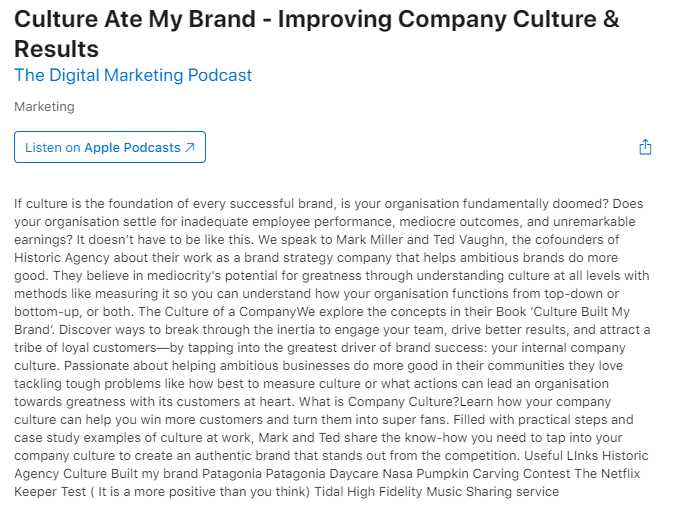

####**Human knowledge summary from Groundtruth:**

This podcast help company to understand their own **company culture** in order to build their **brand**. 

This brand strategy will engage **team** and attract loyal **customers**.

####**Compare our keywords with Groundtruth**:

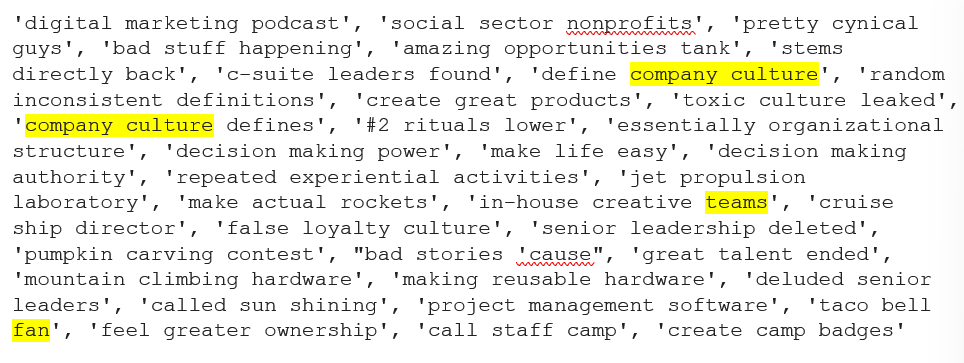

As we can see, our keywords(subtopics) did cover the majority of the summary of groundtruth, such as "company culture, teams,fan"

However, there are too many key words extracted more than what we need. 

Thus, next we are going to tract subtopics from topics(keywords) to make our topic modeling more accurate.


# **3. Descriptive Analysis**

In [ ]:
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

In [ ]:
df_combine.head(5)

,Time,Speaker,Keyword,Score
0,00:00:00,2,digital marketing podcast,9.0
1,00:00:10,2,digital marketing podcast,9.0
2,00:00:17,2,kieran rogers,4.0
3,00:00:22,2,eat,1.0
4,00:00:24,2,subject,1.0


## 3.1 Frequency of Speakers

Look at the distribution of the speakers in the input transcipt



In [ ]:
# counts of Speakers
df_combine.loc[:,'Speaker'].value_counts()

4    177
3    155
2     90
1      3
5      3
Name: Speaker, dtype: int64

In [ ]:
# Percentage of Speakers
df_combine.loc[:,'Speaker'].value_counts(normalize=True)*100

4    41.355140
3    36.214953
2    21.028037
1     0.700935
5     0.700935
Name: Speaker, dtype: float64

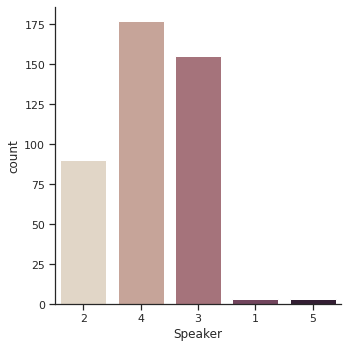

In [ ]:
sns.catplot(x="Speaker", kind="count", palette="ch:.25", data=df_combine)

As we can see from the output:

*   The most frequent Speaker is Speaker 4, which occupies 41%, followed by Speaker 3 (26%) and Speaker 2(21%). 

*   The least frequent speaker is Speaker 1 and Speaker 5 which speaker 1 is mis-transcribed (when voice overlapped) and Speaker 5 is the Advertising pitch at the end



## 3.2 Frequency of Scores

In [ ]:
#Sorting the highest word degree (descending)
df_combine.sort_values(['Score'],ascending=False).groupby('Keyword').head(5)

,Time,Speaker,Keyword,Score
0,00:00:00,2,digital marketing podcast,9.0
416,00:29:16,4,feel greater ownership,9.0
1,00:00:10,2,digital marketing podcast,9.0
236,00:15:08,4,decision making authority,9.0
36,00:02:44,2,bad stuff happening,9.0
...,...,...,...,...
275,00:18:44,3,team,1.0
101,00:06:34,4,advantage,1.0
281,00:19:13,2,kind,1.0
283,00:19:15,4,kind,1.0


In [ ]:
# counts of Scores
df_combine.loc[:,'Score'].value_counts()

1.000000    214
4.000000    164
9.000000     37
3.500000      5
8.000000      4
8.500000      2
3.000000      1
8.333333      1
Name: Score, dtype: int64

In [ ]:
# Percentage of Scores
df_combine.loc[:,'Score'].value_counts(normalize=True) * 100

1.000000    50.000000
4.000000    38.317757
9.000000     8.644860
3.500000     1.168224
8.000000     0.934579
8.500000     0.467290
3.000000     0.233645
8.333333     0.233645
Name: Score, dtype: float64

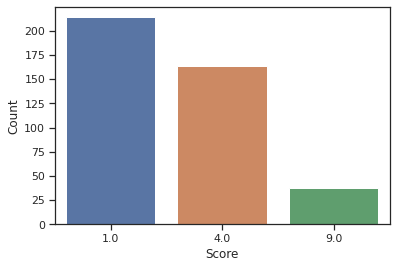

In [ ]:
plot_data = df_combine.groupby('Score').size().reset_index(name='Count').query('Count>=20')
sns.barplot(data=plot_data, x='Score', y='Count')

From the output and plot we can conclude that:


*   The highest score (number 9) has 8.6% of the total; this group represents the words most frequent and more connected of the podcast. 
*   After score 9, there are scores 4 with 38% and 1 with 50%. 
*   Other scores have a representation inferior to 1%. 



# **4. Sub Topics Analysis - topic modeling with Gensim**



After extracting Topics, next we are going to look at sub topics from the result of Topics (Keywords which score is 9.0) dataset.


We are going to use two different ways to extract sub topics in this section:


1.   Method 1: Frequency of words
2.   Method 2: LDA



---

**Method 1: Using "Frequency of words" to extract sub topics**

## 4.1 Data cleaning

first we need to store all message into a list in order to perform vectorisation. 

In [ ]:
# extract only score 9.0 keywords
#df_subTopic = df_combine[df_combine['Score'] == 9.0]
# df_subTopic = df_subTopic['Keyword']
#df_subTopic.head(5)

In [ ]:
# converting entrire text keywords to list
# message = odd_rows["Transcript"].tolist()
# message[1:10] # check some samples of list

In [ ]:
# Then we use score = 9 dataset to run the followlling subtopics extracting 
message = df_topics

In [ ]:
# double check data type after operation
type(message)

list

In [ ]:
import nltk  
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

Since the transcripts is convert as per new line, all the item in list should be converted into a single string and stored in a dataframe - msg for next process.

In [ ]:
#Create msg dataframe
msg = pd.DataFrame()

#Replace msg content by concate the message list items with lower case.
msg = " ".join(message).lower()
msg

"digital marketing podcast digital marketing podcast social sector nonprofits pretty cynical guys bad stuff happening amazing opportunities tank stems directly back c-suite leaders found define company culture random inconsistent definitions create great products toxic culture leaked company culture defines #2 rituals lower essentially organizational structure decision making power make life easy decision making authority repeated experiential activities jet propulsion laboratory make actual rockets in-house creative teams cruise ship director false loyalty culture senior leadership deleted pumpkin carving contest bad stories 'cause great talent ended mountain climbing hardware making reusable hardware deluded senior leaders called sun shining project management software taco bell fan feel greater ownership call staff camp create camp badges"

## 4.2 Remove stop words

In [ ]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
def text_process(mess):  
    STOPWORDS = stopwords.words('english')
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)    
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
msg_clean=text_process(msg)
msg_clean

'digital marketing podcast digital marketing podcast social sector nonprofits pretty cynical guys bad stuff happening amazing opportunities tank stems directly back csuite leaders found define company culture random inconsistent definitions create great products toxic culture leaked company culture defines 2 rituals lower essentially organizational structure decision making power make life easy decision making authority repeated experiential activities jet propulsion laboratory make actual rockets inhouse creative teams cruise ship director false loyalty culture senior leadership deleted pumpkin carving contest bad stories cause great talent ended mountain climbing hardware making reusable hardware deluded senior leaders called sun shining project management software taco bell fan feel greater ownership call staff camp create camp badges'

## 4.3 create wordcloud

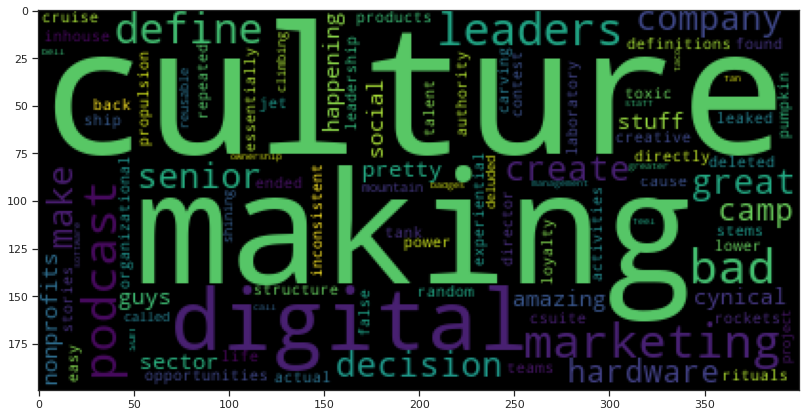

In [ ]:
from wordcloud import WordCloud #visualization techniques for #frequently repeated texts
wc = WordCloud(
    background_color='black',
    max_words = 100,
    random_state = 42,
    max_font_size=110
    )

wc.generate(' '.join([msg_clean]))
plt.figure(figsize=(50,7))
plt.imshow(wc)
plt.show()

##  4.4 Get most_common words by using FreqDist
We can use FreqDist to find the number of occurrences of each word in the text. By getting len(vocab) we get the number of unique words in the text (including punctuation). And we can get the most common words easily too.

In [ ]:
# Load library - word_tokenize
from nltk import word_tokenize

#Word tokenize the string
tokens = word_tokenize(msg_clean)

#Convert String to Text
text = nltk.Text(tokens)

In [ ]:
text

<Text: digital marketing podcast digital marketing podcast social sector...>

Here we got the 30 most common words, filtered only the ones with at least 3 characters, then sorted them descending by number of occurences.
A better way is to first remove all the stop words (see below), then get the FreqDist.

In [ ]:
#Check the Frequency Distribution of text
vocab = nltk.FreqDist(text)
# Print number of vocabulary
print(len(vocab)) 

# Show most common 30 words in the transcripts.
mc = sorted([w for w in vocab.most_common(30) if len(w[0]) > 3], key=lambda x: x[1],reverse=True)
print(mc)

93
[('culture', 4), ('making', 3), ('digital', 2), ('marketing', 2), ('podcast', 2), ('leaders', 2), ('company', 2), ('create', 2), ('great', 2), ('decision', 2), ('make', 2), ('senior', 2), ('hardware', 2), ('camp', 2), ('social', 1), ('sector', 1), ('nonprofits', 1), ('pretty', 1), ('cynical', 1), ('guys', 1), ('stuff', 1), ('happening', 1), ('amazing', 1), ('opportunities', 1), ('tank', 1), ('stems', 1), ('directly', 1), ('back', 1), ('csuite', 1)]


In [ ]:
text.collocations()

digital marketing; marketing podcast; decision making; company culture


Collocations are expressions of multiple words which commonly co-occur. For example, the top ten bigram collocations in Genesis are listed below, as measured using Pointwise Mutual Information.
https://www.nltk.org/howto/collocations.html#overview

4 main subtopics we got using method 1 are


1.   Digital marketing
2.   Marketing Podcast
3.   decision making
4.   Company culture





---


**Method 2:Using "LDA - Latent Dirichlet Allocation" to extract sub topics**

## 4.5 Latent Dirichlet Allocation 
## (soft clustering for sub-topics)

**# What does Gensim do?**

Automatically extract clear, segregated and meaningful topics from large volumes of text.














In [ ]:
#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy
import spacy
from nltk.corpus import stopwords

#vis
!pip install pyldavis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 29.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=60e5a0cf625a240806be4bef5a0d4031614a5e5298c2949e5658805b9f06cb56
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyldavis


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return (texts_out)


In [ ]:
data=odd_rows['Transcript']

In [ ]:
lemmatized_texts = lemmatization(data)
lemmatized_texts

['welcome marketing podcast bring',
 'welcome podcast',
 'name today listener talk culture',
 'actually eat',
 'help subject',
 'couple real culture brand expert',
 'welcome podcast guy',
 'thank have',
 'thank have',
 'very excited',
 'here so guy tell kind background culture brand qualify expert subject',
 'so spend most life',
 'speak leadership executive level nonprofit space lead creative direct',
 'aspect operation role culture play key think past',
 'year work connectivity thing open door insight think only profound client think write book think get today',
 'background',
 'similar spend lot',
 'time marketing',
 'brand side tech social sector nonprofit',
 'face really go almost rebrand different client product service just start notice pattern want identify pattern see experience share make other',
 'marketer brander brand expert',
 'life easy',
 'come work client understand organization function',
 'write book',
 'all right so write book',
 'culture build brand right cover act

In [ ]:
# Tokenize(split) the sentences into words
def gen_words(texts):
  final=[]
  for text in texts:
    new = gensim.utils.simple_preprocess(text, deacc=True)
    final.append(new)
  return (final)


In [ ]:
data_words = gen_words(lemmatized_texts)

data_words

[['welcome', 'marketing', 'podcast', 'bring'],
 ['welcome', 'podcast'],
 ['name', 'today', 'listener', 'talk', 'culture'],
 ['actually', 'eat'],
 ['help', 'subject'],
 ['couple', 'real', 'culture', 'brand', 'expert'],
 ['welcome', 'podcast', 'guy'],
 ['thank', 'have'],
 ['thank', 'have'],
 ['very', 'excited'],
 ['here',
  'so',
  'guy',
  'tell',
  'kind',
  'background',
  'culture',
  'brand',
  'qualify',
  'expert',
  'subject'],
 ['so', 'spend', 'most', 'life'],
 ['speak',
  'leadership',
  'executive',
  'level',
  'nonprofit',
  'space',
  'lead',
  'creative',
  'direct'],
 ['aspect', 'operation', 'role', 'culture', 'play', 'key', 'think', 'past'],
 ['year',
  'work',
  'connectivity',
  'thing',
  'open',
  'door',
  'insight',
  'think',
  'only',
  'profound',
  'client',
  'think',
  'write',
  'book',
  'think',
  'get',
  'today'],
 ['background'],
 ['similar', 'spend', 'lot'],
 ['time', 'marketing'],
 ['brand', 'side', 'tech', 'social', 'sector', 'nonprofit'],
 ['face',


In [ ]:
clean=data_words
for i in range(len(clean)):
  for j in clean[i]:
    if len(j)<=3:
      clean[i].remove(j)
clean

[['welcome', 'marketing', 'podcast', 'bring'],
 ['welcome', 'podcast'],
 ['name', 'today', 'listener', 'talk', 'culture'],
 ['actually'],
 ['help', 'subject'],
 ['couple', 'real', 'culture', 'brand', 'expert'],
 ['welcome', 'podcast'],
 ['thank', 'have'],
 ['thank', 'have'],
 ['very', 'excited'],
 ['here',
  'guy',
  'tell',
  'kind',
  'background',
  'culture',
  'brand',
  'qualify',
  'expert',
  'subject'],
 ['spend', 'most', 'life'],
 ['speak',
  'leadership',
  'executive',
  'level',
  'nonprofit',
  'space',
  'lead',
  'creative',
  'direct'],
 ['aspect', 'operation', 'role', 'culture', 'play', 'think', 'past'],
 ['year',
  'work',
  'connectivity',
  'thing',
  'open',
  'door',
  'insight',
  'think',
  'only',
  'profound',
  'client',
  'think',
  'write',
  'book',
  'think',
  'today'],
 ['background'],
 ['similar', 'spend'],
 ['time', 'marketing'],
 ['brand', 'side', 'tech', 'social', 'sector', 'nonprofit'],
 ['face',
  'really',
  'almost',
  'rebrand',
  'different',

In [ ]:
id2word = corpora.Dictionary(clean)

corpus = []
for text in data_words:
    new = id2word.doc2bow(text)
    corpus.append(new)


In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

In [ ]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.069428  0.162294       1        1  38.876513
2      0.101887 -0.144990       2        1  36.378909
0     -0.171316 -0.017304       3        1  24.744578, topic_info=         Term       Freq      Total Category  logprob  loglift
67       just  16.000000  16.000000  Default  30.0000  30.0000
43      think  28.000000  28.000000  Default  29.0000  29.0000
105      know  21.000000  21.000000  Default  28.0000  28.0000
138    agency  13.000000  13.000000  Default  27.0000  27.0000
145     story  17.000000  17.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
257    listen   3.036940   4.284594   Topic3  -5.2324   1.0524
334      call   3.666454  11.752009   Topic3  -5.0440   0.2318
9    actually   3.665182  13.747588   Topic3  -5.0444   0.0746
73     really   3.847579  27.162581   Topic3  -4.9958  -0.5578
782      tool   3.223225   7.672260   Topic3  -5.1728   0.5293

[155 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
9         2  0.727400  actually
9         3  0.290960  actually
137       2  0.903186     again
138       3  0.982007    agency
726       1  0.820252   already
...     ...       ...       ...
78        3  0.555437      want
53        1  0.649656      work
53        2  0.243621      work
53        3  0.081207      work
55        2  0.903057      year

[148 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

In [ ]:
lda_model.show_topics()

[(0,
  '0.028*"just" + 0.022*"agency" + 0.018*"want" + 0.014*"people" + 0.013*"also" + 0.013*"love" + 0.012*"point" + 0.012*"learn" + 0.011*"layer" + 0.011*"thank"'),
 (1,
  '0.030*"think" + 0.027*"culture" + 0.027*"brand" + 0.026*"really" + 0.023*"know" + 0.018*"work" + 0.015*"example" + 0.014*"make" + 0.012*"team" + 0.012*"organization"'),
 (2,
  '0.020*"story" + 0.019*"thing" + 0.018*"right" + 0.017*"artifact" + 0.015*"book" + 0.014*"then" + 0.013*"value" + 0.013*"culture" + 0.013*"back" + 0.012*"actually"')]

3 main subtopics we got using method 2 (LDA)  are

1.   just,agency,want,people,also,love,point,learn,layer,thank
2.   think,culture,brand,really,know,work,example,make,team,organization
3.   story,thing,right,artifact,book,then,value,culture,back,actually





# Summary and Concolusions:

Topic modelling on an unsupervised data is hard to make an conclusion whether the findings are correct of not. Validation process by human is required and will have bias on the results interpretation.





Transcript tooling is not smart enough to extract speaker name from context. 


  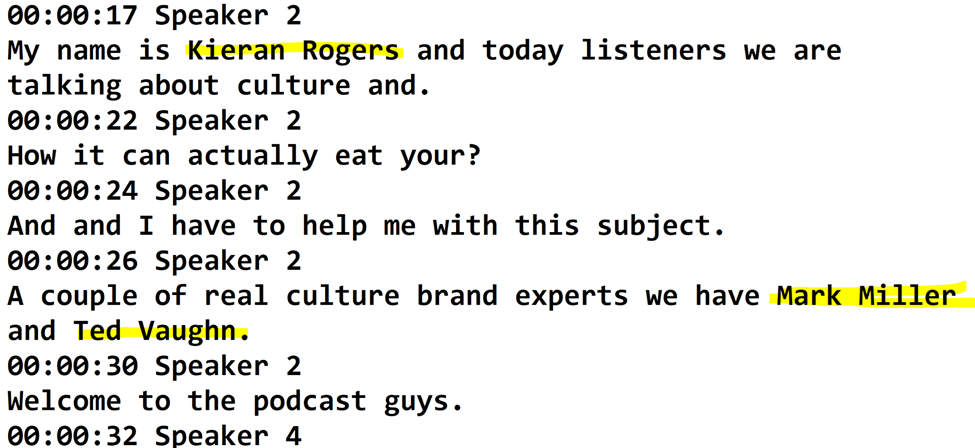

# References





*   https://www.analyticsvidhya.com/blog/2021/10/rapid-keyword-extraction-rake-algorithm-in-natural-language-processing/#free-courses


*   https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/


*   https://towardsdatascience.com/extracting-keyphrases-from-text-rake-and-gensim-in-python-eefd0fad582f

* https://podcasts.apple.com/lb/podcast/culture-ate-my-brand-improving-company-culture-results/id373596600?i=1000542336192